# Image Formation Module

**Notes from Hany Farid's Computer Vision Course (UC Berkley)**
https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/

In [30]:
## Packages we'll need for our exercises below
import numpy as np
from math import sqrt, sin, cos
import matplotlib.pyplot as plt

Using the camera obscura (pinhole camera) as a simple example, we learned that we can mathematically determine where something will show up in a picture relative to the real world position with $x = \begin{pmatrix}-fX \\ Z \end{pmatrix}$ where:

```
x = Projected image location in the camera sensor coordinate system

X = Actual object location in real world coordinate system

Z = Distance between the camera's aperture and actual object in real world coordinate system

f = Focal length (distance between photosensative material and aperture
```

## Exercise #1 - Perspective Projection
Understanding the loss of information in projecting down a dimension - in this case we're projecting from a 2D "real world" to a 1D sensor coordinate system

> Write code that simulates the projection of a line segment defined by two points (-5, Z) an (5, Z) where Z ranges from 10 to 1000, assumig a camera focal length of f=1.

> For each distance Z, project the two points into a 1-D sensor under perspective projection, and compute the length of the segment.

> Plot this length as a function of distance Z to see how size changes as a function of distance to the camera

In [25]:
def plotLengthChanges(Xa, Xb):
    f = 1
    projections = []

    for i in range(10, 1000):
        a = (-f * Xa) / i
        b = (-f * Xb) / i

        dist = sqrt((a-b)**2)
        projections.append(dist)

    plt.plot(projections)
    plt.ylabel('projected length')
    plt.xlabel('distance Z')

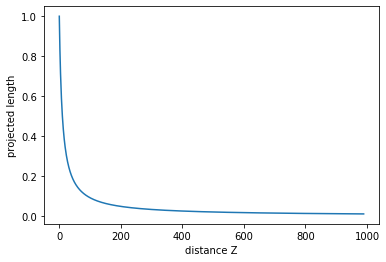

In [26]:
plotLengthChanges(-5, 5)

The exponential drop in size relative to distance from the camera is why we see two paralell lines converging when looking at an image of a straight road, for example

## [Generalizing 2D projection](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-05-perspective2Dgeneralized.mp4)
We've learned about how to generalize the above 2D perspective projection by resolving the three different coordinate systems we're dealing with:

1) World Coordinate System $\begin{pmatrix}X_w \\ Z_w \end{pmatrix}$ - where things are located in the real world (cm)

2) Camera Coordinate System $\begin{pmatrix}X_c \\ Z_c \end{pmatrix}$ - where things are located inside the camera (cm)

3) Sensor Coordinate System $\begin{pmatrix}X_s \\ s \end{pmatrix}$ - where object projections are located in the camera sensor (pixels)

### Specifying a point in the world in the camera coordinate system
This means that we need to resolve the location of an object from the world coordinate system to the camera coordinate system in order to avoid having things change based on where the camera is located. 

We can do this with an in-plane rotation and origin translation from the point in the world. 


$ \begin{pmatrix}
    X_c \\
    Z_c
\end{pmatrix} = \begin{pmatrix}
    \cos(\theta) & -\sin(\theta) & t_x \\
    \sin(\theta) & \cos(\theta) & t_z
\end{pmatrix} \begin{pmatrix}
    X_w \\
    Z_w \\
    1
\end{pmatrix}$

(the extra "1" at the bottom of the last matrix is just using [homeogenius coordinates](https://en.wikipedia.org/wiki/Homogeneous_coordinates) to avoid lugging around the translation as a separate operation)

### Finding the projected object location in Sensor Coordinate system
Now that we have our camera coordinates above (as defined by real world coordinate system) we can resolve object locations into the sensor coordinate system to find the projected location

We can do this by multiplying the camera coordinates with a matrix containing two extra terms:

$ f $ - focal length

$ c_x $ - how much the sensor is offset from the optical axis

$ \begin{pmatrix}
    x_s \\
    s
\end{pmatrix} = \begin{pmatrix}
    f & c_x \\
    0 & 1
\end{pmatrix} \begin{pmatrix}
    X_c \\
    Z_c
\end{pmatrix}$

Multiplying that out we get the following coordinates in the camera coordinate system that will map to the object's location in the sensor coordinate system  $x = x_s/s = (fX_c + c_xZ_c) / Z_c$

### Putting it all together

The last thing we need to do is convert the units from real-world measurments (cm) in the camera coordinate system to pixels in the sensor coordinate system. We do this by adding a $ \Lambda $ term which represents the density of pixels in the sensor... so the final equation, putting all of the above together is:

$ \begin{pmatrix}
    x_s \\
    s
\end{pmatrix} = \Lambda \begin{pmatrix}
    f & c_x \\
    0 & 1
\end{pmatrix} \begin{pmatrix}
    \cos(\theta) & -\sin(\theta) & t_x \\
    \sin(\theta) & \cos(\theta) & t_z
\end{pmatrix} \begin{pmatrix}
    X_w \\
    Z_w \\
    1
\end{pmatrix}$

The **first matrix**, $\begin{pmatrix}
    f & c_x \\
    0 & 1
\end{pmatrix}$, can be thought of an an **_intrinsic_ matrix**, translating the camera system to the sensor system and is typically represented as $K$

The **second matrix**, $\begin{pmatrix}
    \cos(\theta) & -\sin(\theta) & t_x \\
    \sin(\theta) & \cos(\theta) & t_z
\end{pmatrix}$, can be thought of an an **_extrinsic_ matrix**, translating the camera system to the sensor system and is typically represented as $M$

In that way, we can simply refer to the above equation as:
$ \vec p = \Lambda K M \vec P$

### Loss of information
We talked above about loss of information in the perspective projection and see it again algebraically here because a 2 x 3 matrix operation is not invertible

## [3D Perspective Projection](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-06-perspective3D.mp4)

Now instead of projecting from a 2D world to 1D sensor as above, we need to project from a 3D world to a 2D sensor.

So we will be starting with a 3 dimensional world-coordinate and resolving to a 3 dimensional camera coordinate in much the same was as we did above - a rotation + origin translation! The difference is that we're no longer doing an in-plane rotation but are going to have to be able to rotate along the X, Y and Z axis.

### Exercise #2 - 3D to 2D projection
> Write some code that simulates the projection of a 3-D cube under the perspective projection. The eight corners of the cube are:
```
[0,0,0],[1,0,0],[1,1,0],[0,1,0],[0,0,1],[1,0,1],[1,1,1],[0,1,1]
```

> Specify the translation and rotation around the x-, y-, and z- axis and build the 3x4 extrinsic matrix $M$.

> Specify the focal length and camera center, and build the 3x3 intrinsic matrix $K$.

> Project under perspective projection using the projection matrix formulation: 

> $ \begin{pmatrix}
    x_s \\
    y_s \\
    s
\end{pmatrix} = \Lambda \begin{pmatrix}
    f & 0 & c_x \\
    0 & f & c_y \\
    0 & 0 & 1
\end{pmatrix} \begin{pmatrix}
    r_{11} & r_{21} & r_{31} & t_x \\
    r_{12} & r_{22} & r_{32} & t_y \\
    r_{13} & r_{23} & r_{33} & t_z
\end{pmatrix} \begin{pmatrix}
    X_w \\
    Y_w \\
    Z_w \\
    1
\end{pmatrix}$

> Draw the resulting "image" of the cube: $ \vec p = \Lambda K M \vec P$

Some helpful notes from Hany:

1) Assume $c_x$ and $c_y$ are 0 for now to simplify things

2) Assume $t_x$ and $t_y$ are also 0 and just play with the movement of Z

3) The 3x3 rotation in our extrinsic matrix can be defined as below - I will need to define all our theta values:
> $ R = \begin{pmatrix}
    1 & 0 & 0 \\
    0 & \cos(\theta_x) & -\sin(\theta_x) \\
    0 & \sin(\theta_x) & \cos(\theta_x)
\end{pmatrix} \begin{pmatrix}
    \cos(\theta_y) & 0 & \sin(\theta_y) \\
    0 & 1 & 0 \\
    -\sin(\theta_y) & 0 & \cos(\theta_y)
\end{pmatrix} \begin{pmatrix}
    \cos(\theta_z) & -\sin(\theta_z) & 0 \\
    \sin(\theta_z) & \cos(\theta_z) & 0 \\
    0 & 0 & 1
\end{pmatrix}$

(-0.005, 0.02, -0.01, 0.012)

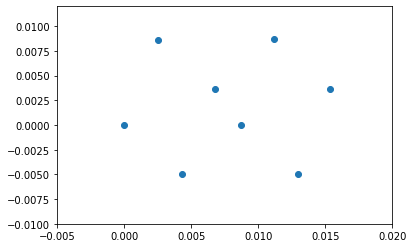

In [79]:
cube = np.array([[0,0,0,1],[1,0,0,1],[1,1,0,1],[0,1,0,1],[0,0,1,1],[1,0,1,1],[1,1,1,1],[0,1,1,1]])

f = 1
tx = 0
ty = 0
tz = 100

Rx = np.radians(30)
Ry = np.radians(30)
Rz = np.radians(0)

# Define the basic rotation matrix for each axis
RMx = np.array([[1,0,0], [0, cos(Rx), -sin(Rx)], [0, sin(Rx), cos(Rx)]])
RMy = np.array([[cos(Ry),0, sin(Ry)],[0,1,0], [-sin(Ry), 0, cos(Ry)]])
RMz = np.array([[cos(Rz), -sin(Rz), 0], [sin(Rz), cos(Rz), 0], [0,0,1]])
M = RMz @ RMy @ RMx

# Add the origin translation terms to complete extrinsic matrix
M = np.append(M, [[tx], [ty], [tz]], axis=1)
    
# Define intrinsic matrix
K = np.array([[f,0,0],[0,f,0],[0,0,1]])

x = []
y = []
for point in cube:
    r = K @ (np.dot(M, point))
    x.append(r[0]/r[2])
    y.append(r[1]/r[2])
    
plt.scatter(x, y)
plt.axis((-0.005,0.02,-0.01, 0.012))

## [Pixels Color Filter Array](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-10-colorFilterArray.mp4)

### Exercise #3 - Generate full RGB image in matplotlib

> Write some code that generates a 256 x 256 image. In this image, the value of each pixel in the i^th image row of the red channel is `i*0.0039`, the value of each pixel in the i^th image row of the green channel is `1-i*0.0039`, and every pixel in the blue channel is `1`. Here, we will encode pixel values in the range [0,1] and display the image using `matplotlib.pyplot.imshow`

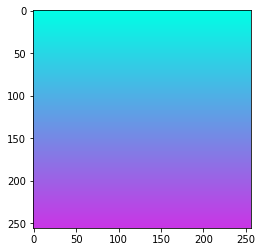

In [130]:
r = np.empty((256,256), dtype=float)
g = np.empty((256,256), dtype=float)
b = np.empty((256,256), dtype=float)

for i in range(0,256):
    r[i] = np.full(256, i*0.0031)
    g[i] = np.full(256, 1-i*0.0031)
    b[i] = np.full(256, .9) 
    
rgbArray = np.zeros((256,256,3), dtype=np.float32)
rgbArray[..., 0] = r
rgbArray[..., 1] = g
rgbArray[..., 2] = b

im = plt.imshow(
    rgbArray
);

## Artifacts - [Lens Distortion](https://farid.berkeley.edu/downloads/tutorials/learnComputerVision/lectures/cv-02-13-lensDistortion.mp4)

We learned that lens distortion can be modeled in the following two equations which map the original $x$ and $y$ values to the new, distorted coordinates $\tilde x$ and $\tilde y$.

$\tilde x = x(1 + kr^2)$

$\tilde y = y(1 + kr^2)$

Where $k$ is the estimated amount of lens distortion and $r$ is the distance from the center of the image:

$r = \sqrt{ (x^2 + y^2)}$

### Exercise #4 - Remove Lens Distortion
This exercise is to define a grid which removes the distortion from some image, given the estimated rate of distortion, $k$. 

Hany provides some scaffoilding code to get us started:

```
from warping import *
import matplotlib.pyplot as plt

# load square, grayscale image 
im = Image.open('HanyFaridDistor.jpg')
[ydim,xdim] = im.size
mid = round(max(xdim,ydim)/2)

# define sampling lattices
n = 100 # latice sampling
dst = griddify(shape_to_rect(im.size), n, n) # destination grid
src = dst # source grid

# define new sampling lattice (src)
k = 0.0000005 # estimated lens distortion
dst = dst - mid # put image center at (0,0)

### [ WRITE CODE HERE -- DEFINE SRC ] ###

dst = dst = mid # re-center
dst = dst.astype(int) # convert to integer
src = src + mid # re-center
src = src.astype(int) # convert to integer
```

In [189]:
# I don't think the `warping` library mentioned above is open source... at least I couldn't find it. 
# But I found some similar functions below from old PIL source code referenced here: https://stackoverflow.com/questions/5071063/is-there-a-library-for-image-warping-image-morphing-for-python-with-controlled
def griddify(rect, w_div, h_div):
    w = rect[2] - rect[0]
    h = rect[3] - rect[1]
    x_step = w / float(w_div)
    y_step = h / float(h_div)
    y = rect[1]
    grid_vertex_matrix = []
    for _ in range(h_div + 1):
        grid_vertex_matrix.append([])
        x = rect[0]
        for _ in range(w_div + 1):
            grid_vertex_matrix[-1].append([int(x), int(y)])
            x += x_step
        y += y_step
    grid = np.array(grid_vertex_matrix)
    return grid

def shape_to_rect(shape):
    assert(len(shape) == 2)
    return (0, 0, shape[0], shape[1])

def grid_to_mesh(src_grid, dst_grid):
    assert(src_grid.shape == dst_grid.shape)
    mesh = []
    for i in range(src_grid.shape[0] - 1):
        for j in range(src_grid.shape[1] - 1):
            src_quad = [src_grid[i    , j    , 0], src_grid[i    , j    , 1],
                        src_grid[i + 1, j    , 0], src_grid[i + 1, j    , 1],
                        src_grid[i + 1, j + 1, 0], src_grid[i + 1, j + 1, 1],
                        src_grid[i    , j + 1, 0], src_grid[i    , j + 1, 1]]
            dst_quad = [dst_grid[i    , j    , 0], dst_grid[i    , j    , 1],
                        dst_grid[i + 1, j    , 0], dst_grid[i + 1, j    , 1],
                        dst_grid[i + 1, j + 1, 0], dst_grid[i + 1, j + 1, 1],
                        dst_grid[i    , j + 1, 0], dst_grid[i    , j + 1, 1]]
            dst_rect = quad_to_rect(dst_quad)
            mesh.append([dst_rect, src_quad])
    return mesh

def quad_to_rect(quad):
    assert(len(quad) == 8)
    assert(quad_as_rect(quad))
    return (quad[0], quad[1], quad[4], quad[3])

def quad_as_rect(quad):
    if quad[0] != quad[2]: return False
    if quad[1] != quad[7]: return False
    if quad[4] != quad[6]: return False
    if quad[3] != quad[5]: return False
    return True

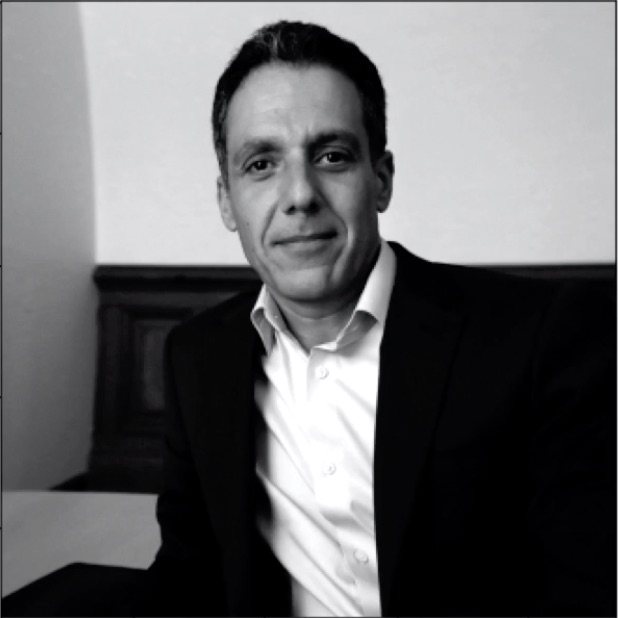

In [255]:
from PIL import Image

# load square, grayscale image that I shamelessly took for this exercise from Hany's slides here: https://farid.berkeley.edu/learnComputerVision/lectures/cv-02-13-lensDistortion.mp4
im = Image.open('../images/HanyFaridDistort.jpg')
[ydim,xdim] = im.size
mid = round(max(xdim,ydim)/2)

# You can see that the vertical line in the background is bowed out - indicating a pin cushion distortion.. k > 0
display(im)

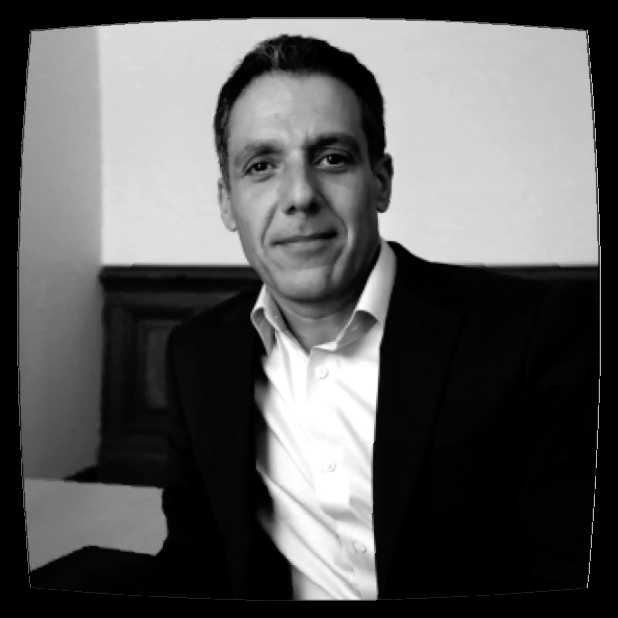

In [256]:
# define sampling lattices
n = 100 # latice sampling
dst = griddify(shape_to_rect(im.size), n, n) # destination grid
src = dst # source grid

# define new sampling lattice (src)
k = 0.0000007 # I changed this from .0000005 to .0000007 after rendering
dst = dst - mid # put image center at (0,0)
for row, i in enumerate(dst):
    for col, j in enumerate(i):
        r = sqrt(j[0]**2 + j[1]**2)
        x = j[0] * (1 + k*r**2)
        y = j[1] * (1 + k*r**2)
        src[row][col] = [x,y]

dst = dst + mid # re-center
dst = dst.astype(int) # convert to integer
src = src + mid # re-center
src = src.astype(int) # convert to integer

mesh = grid_to_mesh(src, dst)
imt = im.transform(im.size, Image.MESH, mesh)
display(imt)

## [JPEG Compression](https://farid.berkeley.edu/learnComputerVision/lectures/cv-02-14-JPEGcompression.mp4)

JPEG storage is cheap but uses lossy compression to reduce the size of the image - the general process is:

1. RGB (in [0,255])
2. RGB to YCbCr (in [0,255])
3. Downsample Cb/Cr (optional)
4. Partition each channel into non-overlapping 8x8 pixel blocks
5. Discrete cosine transform (DCT-II) each block
6. Quantize DCT coefficients
7. Entropy encode quantized DCT coefficients

To execute the discrete cosine transform you need to take each value $u$ (rows) and $v$ (cols) and compute the following:

$ F_c(u,v) = \alpha _{u,v} 
\sum_{x=0} ^7
\sum_{y=0} ^7
f_c(x,y) 
\cos(\frac{(2x+1)u\pi} {16})
\cos(\frac{(2y+1)v\pi} {16})
$

To then quantize the DCT coefficents you need to compute:

$\hat{F}_c(u,v)
\lfloor \frac{F_c(u,v)}{q_c(u,v)} \rfloor$

Finding the DCT doesn't save any space - but the savings comes from quantizing the values because it takes each value and divides by some number then finds the floor... so all the small values can be encoded as 0

### Exercise #5 - Compute quantized DCT coefficients

> Write a Python function that takes as input an 8x8 numpy array of random pixel values and an 8x8 numpy array of quantization values, and returns the quantized 8x8 DCT coefficients.

$ F_c(u,v) = \alpha _{u,v} 
\sum_{x=0} ^7
\sum_{y=0} ^7
f_c(x,y) 
\cos(\frac{(2x+1)u\pi} {16})
\cos(\frac{(2y+1)v\pi} {16})
$

Where:
$\alpha_u,v = \alpha_u \alpha_v$

if $u = 0$ then $\alpha_u, \alpha_v$ = $\sqrt{1/8}$ else $\sqrt{2/8}$

--- 
Hany helps us break down the DCT equation in setting up this exercise;

- $ F_c(u,v)$ = the DCT transform where u and v go from 0-7 across and down in our 8x8 matrix below

- $ \alpha _{u,v} $ is explained above - it's just a scaling value 

- $ \sum_{x=0} ^7
\sum_{y=0} ^7 $ means that we're doing a double sum over all values of x and y

- $ f_c(x,y) $ are the actual x,y in each loop as we iterate through the double sum above

- $ \cos(\frac{(2x+1)u\pi} {16})
\cos(\frac{(2y+1)v\pi} {16}) $ for each x,y and u,v we're finding the cosine terms defined here and summing them all up

This will give us the DCT coeffient for $(u,v)$



In [349]:
# array of random pixel values
P = np.random.randint(0, 255, size=(8, 8))

# array of quantization values (setting all to two for now)
Q = np.empty(shape=(8,8))
Q.fill(2)

In [353]:
def findDCT(P, Q):
    if (P.shape[0] != P.shape[1]) | (len(P.shape) != 2) | (P.shape != Q.shape):
        raise('assumes square matrices as input')

    s = P.shape[0]
    DCT = np.zeros(shape=(s,s))

    # Loop over every u,v as row/cols in the input matrix P
    for u in range(0, s):
        for v in range(0, s):
            au = np.sqrt(1/8) if u == 0 else np.sqrt(2/8)
            av = np.sqrt(1/8) if v == 0 else np.sqrt(2/8)
            
            # double sum over every x,y value in pixel matrix P
            s2 = 0
            for x in range(0,8):
                s1 = 0
                for y in range(0,8):
                    s1 += P[x,y] * np.cos(((2*x+1)*u*np.pi)/16) * np.cos(((2*y+1)*v*np.pi)/16)
                s2 += s1
            DCT[u,v] = au * av * s2

    return np.array( DCT/Q, dtype=int )

print('input pixel matrix: \n', P, '\n')
print('quantized DCT coefficents: \n', findDCT(P,Q))
    
    

input pixel matrix: 
 [[  3 147 121 150  61  96 154 202]
 [243  63  95 198  63 222  84 217]
 [151  93 227 101 115 170 182  15]
 [ 90  31 195 236 168  47  17   9]
 [ 33 249  18  76 153 204 242 125]
 [195  59 113 200 184 152  18 106]
 [253 122  79 133 176 128 146 197]
 [252 103 116  21 146  13  16 189]] 

quantized DCT coefficents: 
 [[511  11  -1  15  46   9  25  -6]
 [  0 -36 -36 -42 -63  42   5 -41]
 [  3  -9  93 -29  46 -15  28   0]
 [ 19 -59  -1  -3  -5 -28 -43 -57]
 [-51 -15  -6 -51 -28 -45 -57  12]
 [-14  21 -50 -38   8  25  -8  33]
 [-31  26 -30 -14 -27   0  12  37]
 [ 32 -54  51  28 -99 -23 -67  10]]


In [352]:
# Checking my work by comparing against Hany's solution in the slides
# min 15 on https://farid.berkeley.edu/learnComputerVision/lectures/cv-02-14-JPEGcompression.mp4

def hanySolution(B,Q):
    D = np.zeros((8,8)) # initialize
    y,x = np.meshgrid(np.arange(1,9,1), np.arange(1,9,1))
    for i in range(1,9):
        for j in range(1,9):
            ai = np.sqrt(1/8) if i == 1 else np.sqrt(2/8)
            aj = np.sqrt(1/8) if j == 1 else np.sqrt(2/8)
            D[i-1,j-1] = ai * aj * np.sum( np.sum(B * np.cos(np.pi*(2*x-1)*(i-1)/16) *
                                                      np.cos(np.pi*(2*y-1)*(j-1)/16)))
    return( np.array(D/Q, dtype=int) ) # quantize
                  
print('input pixel matrix: \n', P, '\n')
print('quantized DCT coefficients: \n', hanySolution(P,Q))

input pixel matrix: 
 [[  3 147 121 150  61  96 154 202]
 [243  63  95 198  63 222  84 217]
 [151  93 227 101 115 170 182  15]
 [ 90  31 195 236 168  47  17   9]
 [ 33 249  18  76 153 204 242 125]
 [195  59 113 200 184 152  18 106]
 [253 122  79 133 176 128 146 197]
 [252 103 116  21 146  13  16 189]] 

quantized DCT coefficients: 
 [[511  11  -1  15  46   9  25  -6]
 [  0 -36 -36 -42 -63  42   5 -41]
 [  3  -9  93 -29  46 -15  28   0]
 [ 19 -59  -1  -3  -5 -28 -43 -57]
 [-51 -15  -6 -51 -28 -45 -57  12]
 [-14  21 -50 -38   8  25  -8  33]
 [-31  26 -30 -14 -27   0  12  37]
 [ 32 -54  51  28 -99 -23 -67  10]]
